# Exploratory Data Analysis of seagrass dataset

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
#load the data

path = r"C:\Users\nw431\OneDrive - University of Exeter\1_PhD Research\Project1_Carbon Model\Seagrass env variables\1E_Final dataset\Outputs\final_dataset.csv"
df = pd.read_csv(path, index_col = 0)

In [3]:
#tidy up dataset

#drop rows with nan in long/lat column (to remove those with no data)
df = df[df['Lat'].notna()]

#rename to combine Z.marina mixed to one name
df['Species'].replace({'Z. marina/Z. angustifolia/Z. noltii/Ruppiaspp.': 'Z. marina mixed', 'Z. marina/Z. noltii': 'Z. marina mixed'}, inplace = True)
df['Species'].unique()

array(['Z. marina', 'unvegetated', 'Z. japonica', 'Z. marina mixed',
       'Z. angustifolia/Z. noltii', 'Z. angustifolia', 'Z. notlii'],
      dtype=object)

# Carbon EDA

### Carbon distributions

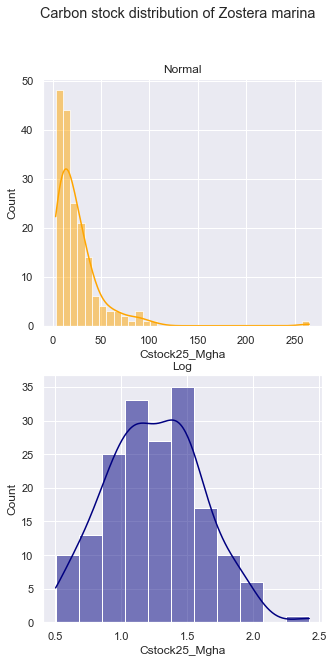

In [94]:
## Plot carbon distributions 
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5,10))
# all samples distributions
#sns.histplot(df.Cstock25_Mgha, kde = True, ax = ax1)

# Z. marina only

# use only Z.marina data - remove species cat
zmarina = ['Z. marina', 'Z. marina mixed']
df_zm = df[df['Species'].isin(zmarina)]
df_zm = df_zm.drop('Species', axis = 1)

sns.histplot(df_zm.Cstock25_Mgha, kde =True, ax = ax1, color = 'orange')
ax1.set_title('Normal')

sns.histplot(np.log10(df_zm.Cstock25_Mgha), kde =True, color = 'navy', ax = ax2)
ax2.set_title('Log')
fig.suptitle('Carbon stock distribution of Zostera marina')
plt.show()

In [51]:
print('Mean carbon stock (Mg C ha): ', np.round(np.mean(df.Cstock25_Mgha),decimals = 2))
print('Standard deviation of Corg stocks: ', np.round(np.std(df.Cstock25_Mgha), decimals =2))
print('Variance: ', np.round(np.var(df.Cstock25_Mgha), decimals = 2))
print('From min value: ', np.round(np.min(df.Cstock25_Mgha), decimals =2), 'Mg C ha to max value: ', np.round(np.max(df.Cstock25_Mgha), decimals = 2), 'Mg C ha')

Mean carbon stock (Mg C ha):  23.53
Standard deviation of Corg stocks:  25.47
Variance:  648.8
From min value:  1.48 Mg C ha to max value:  265.23 Mg C ha


In [59]:
df.Species.unique()

array(['Z. marina', 'unvegetated', 'Z. japonica', 'Z. marina mixed',
       'Z. angustifolia/Z. noltii', 'Z. angustifolia', 'Z. notlii'],
      dtype=object)

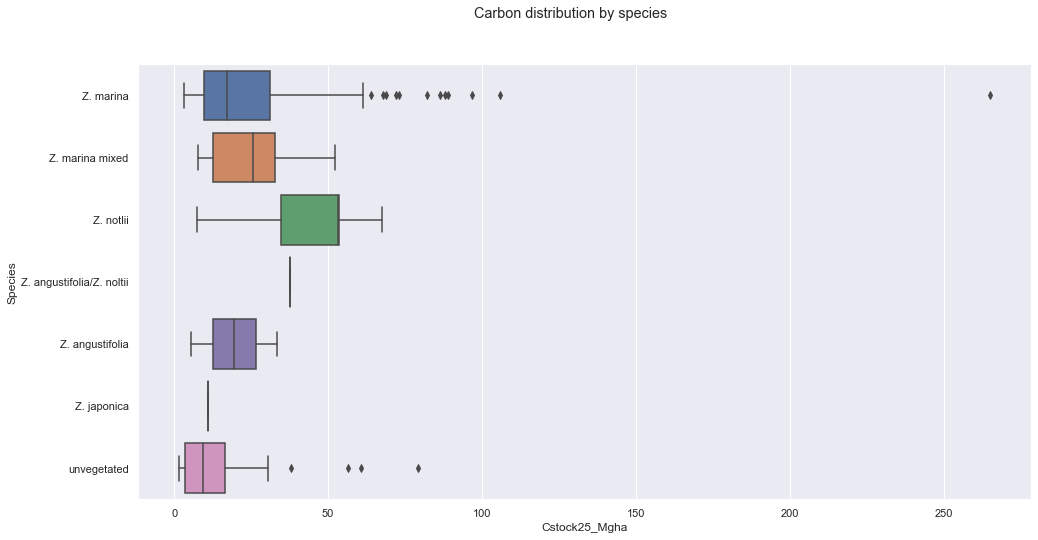

In [66]:
fig = plt.subplots(figsize = (16,8))
sns.boxplot(data =df, x ='Cstock25_Mgha', y = 'Species', 
            order=['Z. marina', 'Z. marina mixed', 'Z. notlii', 
                   'Z. angustifolia/Z. noltii', 'Z. angustifolia', 
                   'Z. japonica','unvegetated'])  
plt.suptitle('Carbon distribution by species')
plt.show()

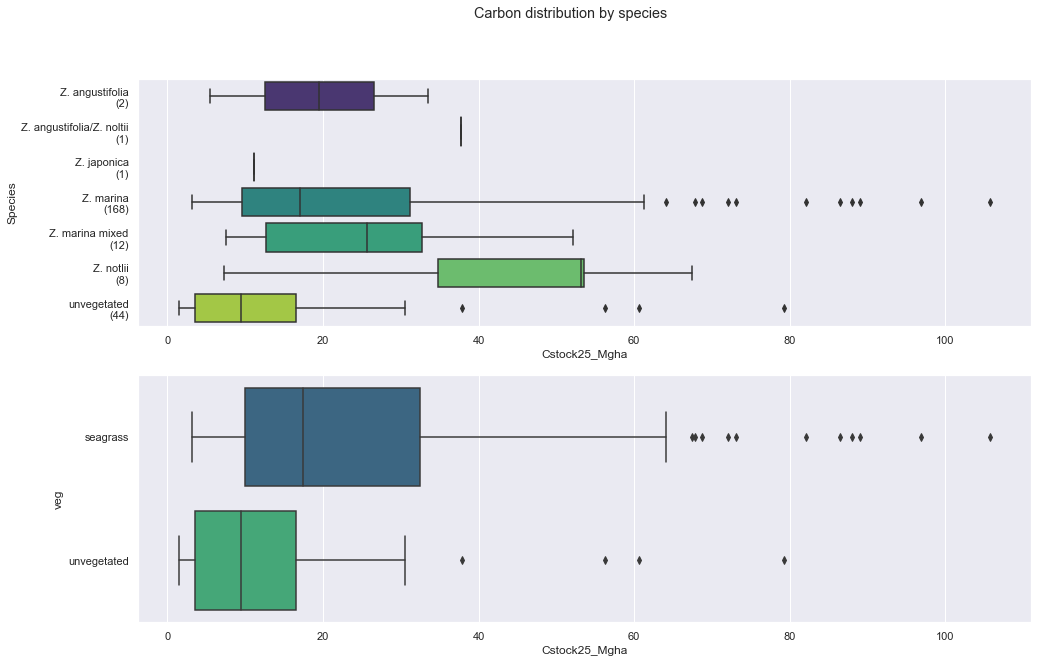

In [91]:
## replot without the outlier and n samples
#remove outlier
outlier = df[df['Cstock25_Mgha'] > 250].index
df_ro = df.drop(outlier)    #df with no outlier

order=['Z. marina', 'Z. marina mixed', 'Z. notlii', 
                   'Z. angustifolia/Z. noltii', 'Z. angustifolia', 
                   'Z. japonica','unvegetated']
df_ro = df_ro.sort_values(by = 'Species')

cnts = dict(df_ro['Species'].value_counts())
cnts = dict(sorted(cnts.items()))
key = list(cnts.keys())
vals = list(cnts.values())

#re-plot
fig, ax = plt.subplots(2,1, figsize = (16,10))
g = sns.boxplot(data =df_ro, 
                x ='Cstock25_Mgha', 
                y = 'Species', 
                order = key,
                palette = 'viridis', 
                ax = ax[0]
               )  
g.set_yticklabels([(key[i]+'\n('+str(vals[i])+')') for i in range(len(key))])

#second plot compare all seagrass vs unvegetated
#create column unveg vs seagrass
df_ro['veg'] = np.where(
    df_ro['Species'] == 'unvegetated', 'unvegetated', 'seagrass')

g2 = sns.boxplot(data = df_ro, 
                 x = 'Cstock25_Mgha', 
                 y = 'veg', 
                 palette = 'viridis', 
                 ax = ax[1]
                )
plt.suptitle('Carbon distribution by species')
plt.show()

#### Pairplots

In [46]:
pp_foi = ['Cstock25_Mgha', 'exposure', 'mean_area_p3qaa_zSD',
       'soil_silt%',
       'soil_carbon_stock', 'MEAN_SIG_WAVEHEIGHT',
       'Tidal_range', 'ERODIBILITY']
foi = ['Cstock25_Mgha', 'exposure', 'NEAR_DIST', 'mean_area_p3qaa_zSD',
       'mean_pressure', 'soil_erosion', 'soil_water', 'soil_silt%',
       'soil_carbon_stock', 'PAR_mean', 'forest%', 'MEAN_SIG_WAVEHEIGHT',
       'REGIONAL_SINUOSITY', 'GHM', 'OUTFLOW_DENSITY', 'mean_rain',
       'Tidal_range', 'ERODIBILITY', 'TEMP_MOISTURE', 'EMU_PHYSICAL']
df_foi = df.loc[:, foi]
df_pp_foi = df.loc[:, pp_foi]

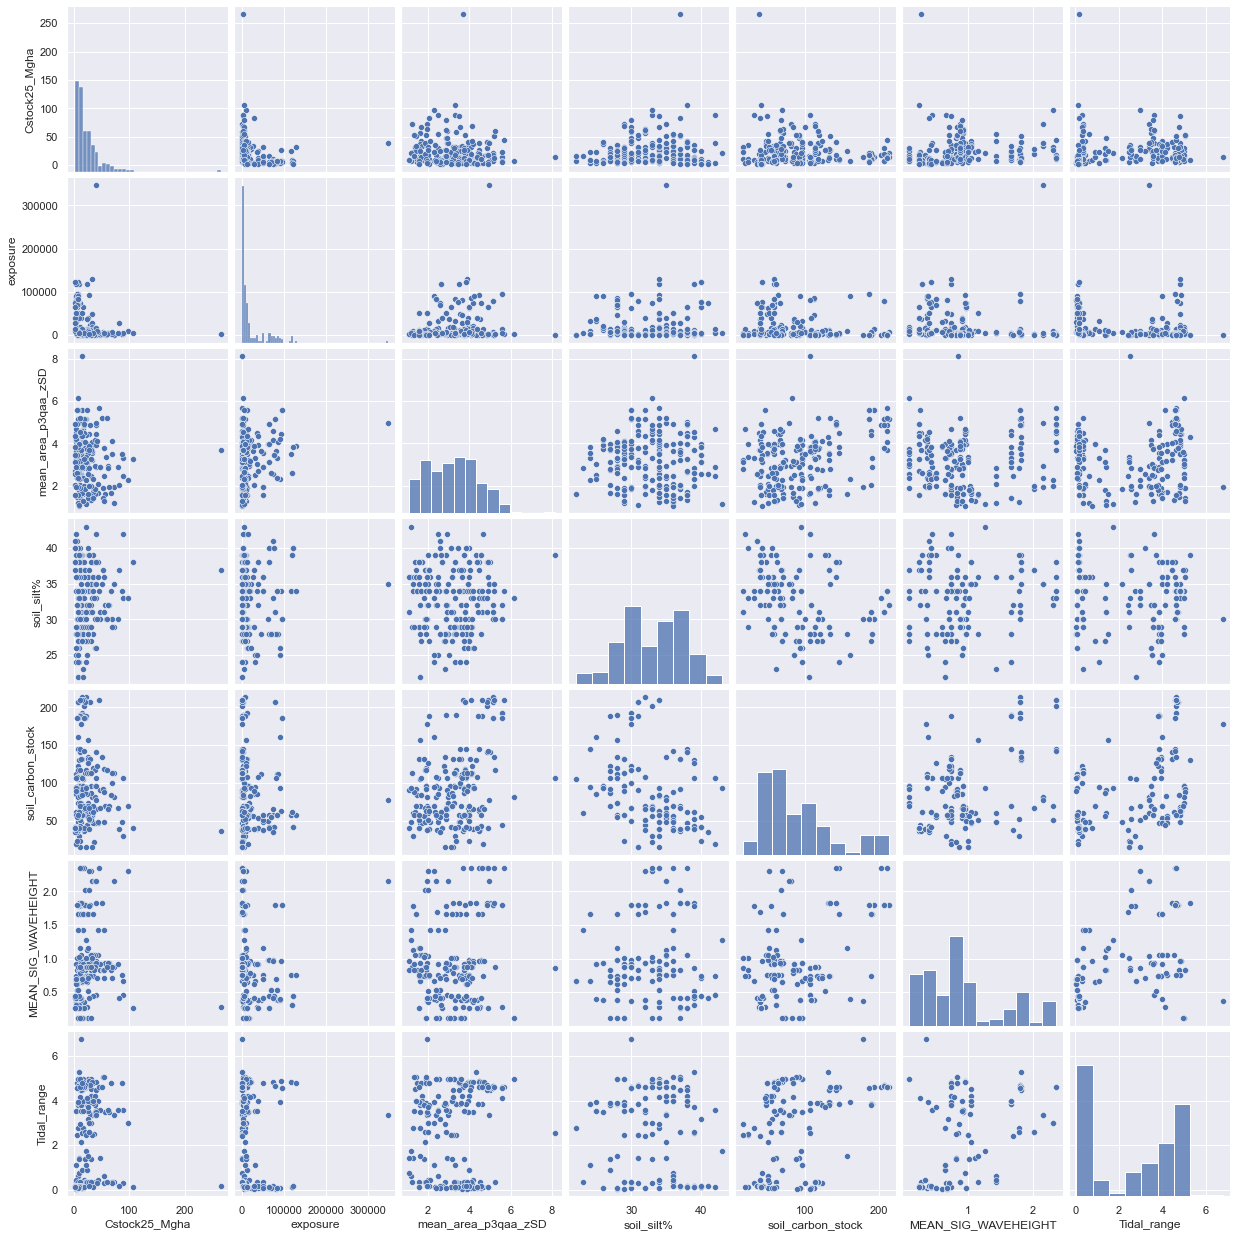

In [47]:
sns.pairplot(df_pp_foi)

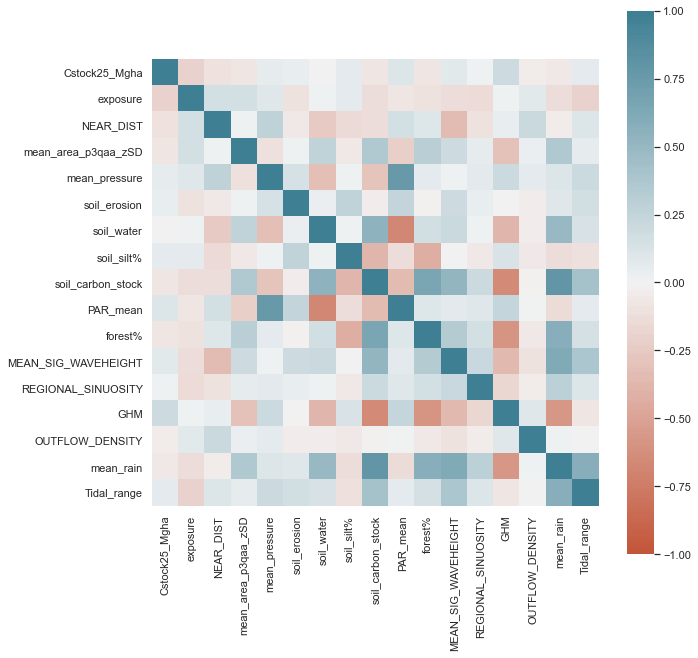

In [97]:
fig, plt.subplots(figsize = (10,10))
sns.heatmap(
    df_foi.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.show()

### Eco-region and carbon visualisation

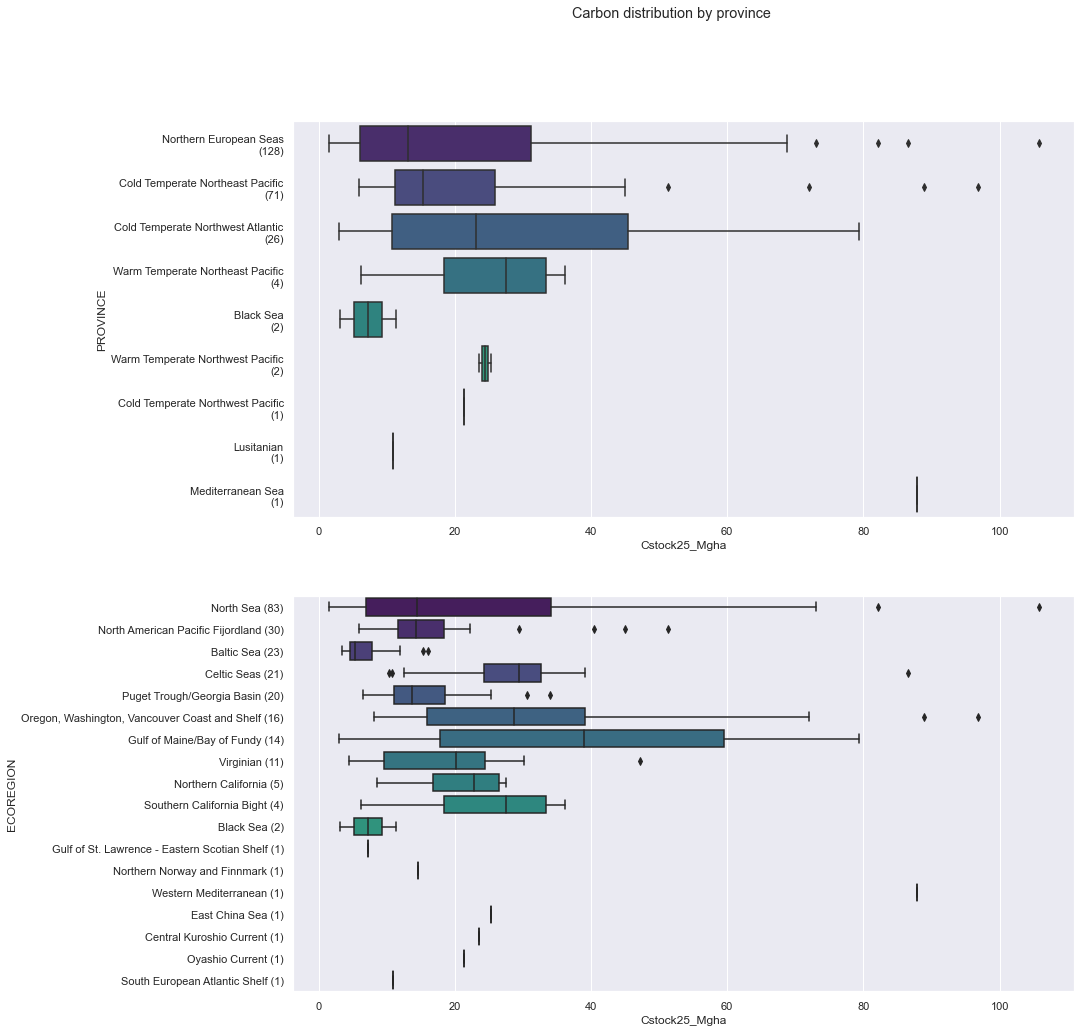

In [133]:
cnts = dict(df_ro['PROVINCE'].value_counts())
key = list(cnts.keys())
vals = list(cnts.values())

fig, ax = plt.subplots(2,1, figsize = (14,16))
g = sns.boxplot(data = df_ro, 
                 x = 'Cstock25_Mgha', 
                 y = 'PROVINCE', 
                 palette = 'viridis', 
                 order = key,
                ax = ax[0]
                )
g.set_yticklabels([(key[i]+'\n('+str(vals[i])+')') for i in range(len(key))])

cnts2 = dict(df_ro['ECOREGION'].value_counts())
key2 = list(cnts2.keys())
vals2 = list(cnts2.values())

g2 = sns.boxplot(data = df_ro, 
                 x = 'Cstock25_Mgha', 
                 y = 'ECOREGION', 
                 palette = 'viridis', 
                 order = key2,
                ax = ax[1]
                )
g2.set_yticklabels([(key2[i]+' ('+str(vals2[i])+')') for i in range(len(key2))])
plt.suptitle('Carbon distribution by province')
plt.show()


In [ ]:
### Map 

In [ ]:
## convert df to geopandas df

In [ ]:
grp_Corg_region = gdf_intersect.groupby('ECOREGION')['Cstock25_Mgha'].mean()
grp_Corg_region.head()
meow_Corg = meow.merge(grp_Corg_region, on='ECOREGION')
meow_Corg.head()

In [ ]:
#create centroid point in grouped ecoregion data set
meow_Corg['centroid'] = meow_Corg.geometry.representative_point()

In [ ]:
meow_Corg_centroid = meow_Corg.set_geometry('centroid')

In [ ]:
#merge with grp by region to include number of sites per region i.e. number of samples in each region
meow_Corg_count = meow_Corg_centroid.merge(grp_by_region, on='ECOREGION')
meow_Corg_count.rename(columns={'Site_name': 'No_sample_points'}, inplace=True)
meow_Corg_count.head()

In [ ]:
fig, ax=plt.subplots(figsize=(30,18))
world.plot(ax=ax, alpha = 0.4)
meow_Corg_count.plot(column = 'Cstock25_Mgha', 
                     ax=ax, 
                     markersize = meow_Corg_count['No_sample_points']*50, 
                     label = 'Number of sample points', 
                     legend=True,
                       legend_kwds={'label':'Average Corg Stock MgCha', 
                           'orientation': 'horizontal'},
              cmap = 'summer', alpha = 0.8)
plt.title('Carbon stocks in Zostera marina', fontsize =20)
plt.ylim(20,100)
ax.legend()
ax.set_axis_off()
plt.show()

In [ ]:
#other way around - size of blob is carbon stock and colour is number of points
fig, ax=plt.subplots(figsize=(30,18))
world.plot(ax=ax, alpha = 0.4)
meow_Corg_count.plot(column = 'No_sample_points', 
                     ax=ax, 
                     markersize = meow_Corg_count['Cstock25_Mgha']*50, 
                     label = 'Average Corg Stock MgCha', 
                     legend=True,
                       legend_kwds={'label':'Number of sample points', 
                           'orientation': 'horizontal'},
              cmap = 'summer', alpha = 0.8)
plt.title('Carbon stocks in Zostera marina', fontsize =20)
plt.ylim(20,100)
ax.legend()
ax.set_axis_off()
plt.show()